In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [25]:
#----Voting Classfication-----#

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification

#Meta-Estimators are Models that can have another models as input (parameter) ex: VotingClassifier,StackingClassifier

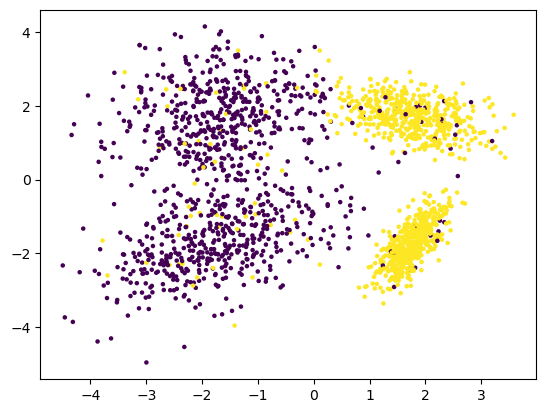

In [27]:
X,y = make_classification(n_samples=2000, n_features=2,
                         n_redundant=0,random_state=21,
                         class_sep=1.75,flip_y=0.1)
plt.scatter(X[:,0],X[:,1],c=y,s=5)

In [28]:
df = pd.DataFrame(data=X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

print(df)

      Feature 1  Feature 2  Target
0     -2.425970   0.736852       0
1      1.162674   1.252424       1
2     -1.053790  -0.643952       1
3     -2.114229   1.212922       0
4     -1.213860   2.837539       0
...         ...        ...     ...
1995  -1.295187   0.583695       0
1996   1.908893  -1.584082       1
1997  -1.358599   3.396694       0
1998   0.137831   2.255640       0
1999   2.154306  -0.782294       1

[2000 rows x 3 columns]


In [29]:
# LogisticRegression is too general , seprating classes with a single one
# KNeighbors is too specific 
# VotingClassifier can insert mutiple estimators with different wights
# VotingClassifier([est1,est2,...],
#                    weight = [1,2,...]) # the gridSearch can auto best way to model your dataset with you manualing weights

In [30]:
def make_plots():
    X_new = np.concatenate([
        np.random.uniform(np.min(X[:, 0]), np.max(X[:, 0]), (20000, 1)),
        np.random.uniform(np.min(X[:, 1]), np.max(X[:, 1]), (20000, 1))
    ], axis=1)
    plt.figure(figsize=(16, 4))
    plt.subplot(141)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
    plt.title("original data")
    plt.subplot(142)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf1.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens1")
    plt.subplot(143)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf2.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens2")
    plt.subplot(144)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf3.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens3");

# a fuction to plot estimator to compare to each other

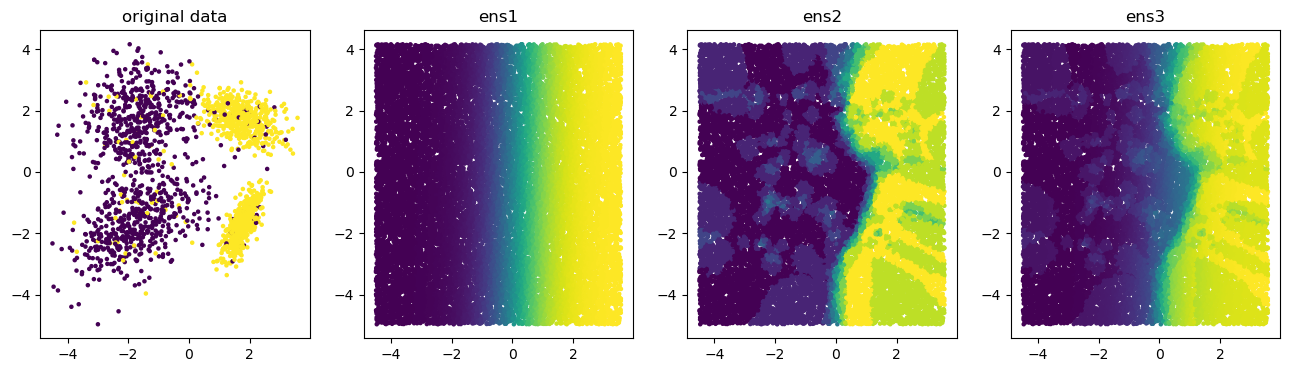

In [31]:
clf1 = LogisticRegression().fit(X,y)
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X,y)
clf3 = VotingClassifier(estimators=[('clf1',clf1),('clf2',clf2)], # the 'clf1' is the name of the estimator and clf1 is the est
                       voting='soft',  # Averaging proba Values
                       weights=[0.5,0.5])
clf3.fit(X,y)

make_plots()

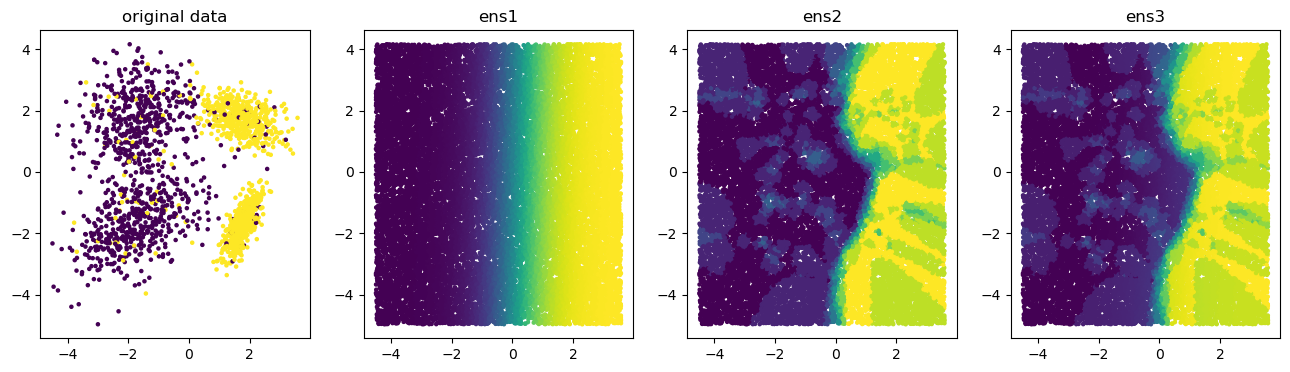

In [32]:
clf1 = LogisticRegression().fit(X,y)
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X,y)
clf3 = VotingClassifier(estimators=[('clf1',clf1),('clf2',clf2)],
                       voting='soft',  
                       weights=[0.5,2.5]) # here to changed prio to KNeighbors , they are similar now
clf3.fit(X,y)

make_plots()